In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree



plt.style.use('seaborn')
np.random.seed(124)

dataset = pd.read_csv('Video_Game_Sales_as_of_Jan_2017.csv')

dataset.head()

#eda plots
#means for genre pd.get_dummies
#build tree
#get prediction
#check mean-squared error
#building random forest
#check predictions
#calculate error
#retrieve feature importances from random forest
#genre, YoR, platform, publisher 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [3]:
#cleaning and sorting data
    
dataset = dataset.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score','Critic_Count','User_Score','User_Count','Rating'], axis=1)
dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.57
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.78
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,31.37


In [4]:
#Wii Sports is an outlier, only on one platform

#dataset.sort_values('Global_Sales',ascending=False)


In [5]:
dataset.isna().sum()

Name               0
Platform           0
Year_of_Release    8
Genre              0
Publisher          1
Global_Sales       0
dtype: int64

In [6]:
dataset.dropna(axis=0,inplace=True)

In [7]:
dataset.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
dtype: int64

<AxesSubplot:xlabel='Global_Sales'>

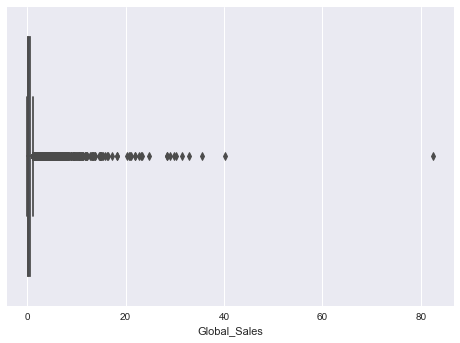

In [8]:
#detect outliers
#wii sports is the outlier
sns.boxplot(x = dataset['Global_Sales'])

<AxesSubplot:xlabel='Year_of_Release'>

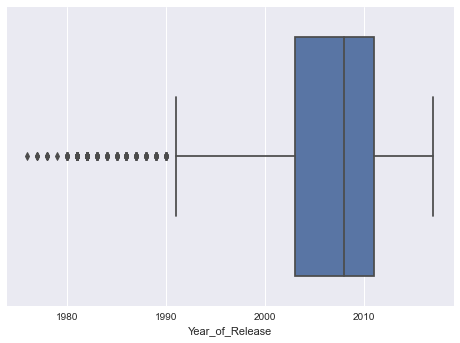

In [9]:
sns.boxplot(x=dataset['Year_of_Release'])

<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

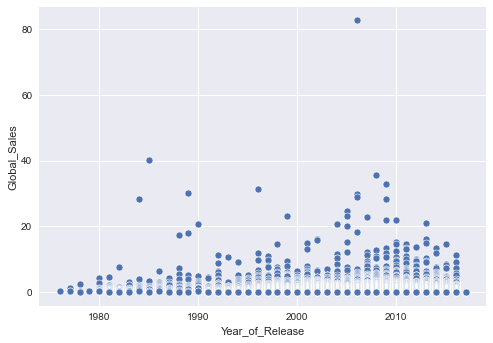

In [10]:
sns.scatterplot(x='Year_of_Release',y='Global_Sales', data=dataset)

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

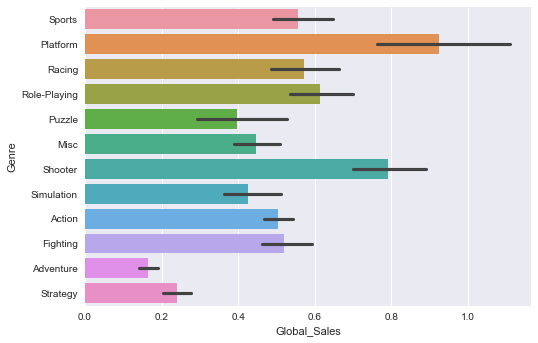

In [11]:
sns.barplot(y='Genre',x='Global_Sales',data=dataset)

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

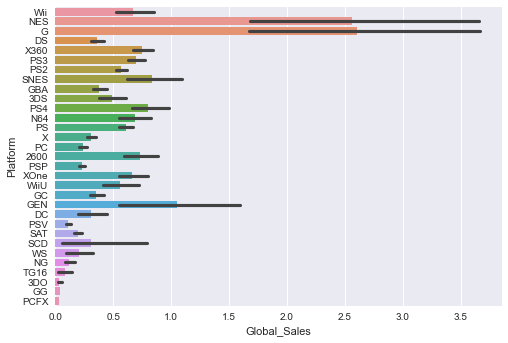

In [12]:
sns.barplot(y='Platform',x='Global_Sales',data=dataset)

## Preproscessing the data

In [13]:
#pd.get_dummies(dataset['Genre'])
    
#dataset['Genre1'] = pd.factorize(dataset['Genre'])[0]
#dataset.head()

In [14]:
Genre_dummies=pd.get_dummies(dataset['Genre'])
Platform_dummies = pd.get_dummies(dataset['Platform'])


In [15]:
dataset.Publisher.nunique()

627

In [16]:
dataset=dataset.drop(columns=['Name','Platform','Publisher','Genre'])
dataset=pd.concat([dataset,Genre_dummies,Platform_dummies],axis=1)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17408 entries, 0 to 17415
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  17408 non-null  float64
 1   Global_Sales     17408 non-null  float64
 2   Action           17408 non-null  uint8  
 3   Adventure        17408 non-null  uint8  
 4   Fighting         17408 non-null  uint8  
 5   Misc             17408 non-null  uint8  
 6   Platform         17408 non-null  uint8  
 7   Puzzle           17408 non-null  uint8  
 8   Racing           17408 non-null  uint8  
 9   Role-Playing     17408 non-null  uint8  
 10  Shooter          17408 non-null  uint8  
 11  Simulation       17408 non-null  uint8  
 12  Sports           17408 non-null  uint8  
 13  Strategy         17408 non-null  uint8  
 14  2600             17408 non-null  uint8  
 15  3DO              17408 non-null  uint8  
 16  3DS              17408 non-null  uint8  
 17  DC          

In [18]:
    
#dataset['Publisher1'] = pd.factorize(dataset['Publisher'])[0]
#dataset.head()

In [19]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year_of_Release    8.0
Global_Sales       0.4
Action             0.0
Adventure          0.0
Fighting           0.0
Misc               0.0
Platform           0.0
Puzzle             0.0
Racing             0.0
Role-Playing       0.0
Shooter            0.0
Simulation         0.0
Sports             0.0
Strategy           0.0
2600               0.0
3DO                0.0
3DS                0.0
DC                 0.0
DS                 0.0
G                  0.0
GBA                0.0
GC                 0.0
GEN                0.0
GG                 0.0
N64                0.0
NES                0.0
NG                 0.0
PC                 0.0
PCFX               0.0
PS                 0.0
PS2                0.0
PS3                0.0
PS4                0.0
PSP                0.0
PSV                0.0
SAT                0.0
SCD                0.0
SNES               0.0
TG16               0.0
WS                 0.0
Wii                0.0
WiiU               0.0
X                  0.0
X360       

In [20]:
X = dataset.drop(columns=['Global_Sales'])
y = dataset['Global_Sales']


In [21]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
y_test

10777    0.10
2026     1.03
2025     1.03
101      7.42
11782    0.08
         ... 
15403    0.02
11665    0.08
7248     0.22
13042    0.05
4341     0.45
Name: Global_Sales, Length: 5223, dtype: float64

In [23]:
dr= DecisionTreeRegressor(random_state=42)
dr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
y_pred_test=dr.predict(X_test)
y_pred_train=dr.predict(X_train)

In [25]:
print("Error Metrics")
print("Training Errors")
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Train RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("-------------------------")
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))

Error Metrics
Training Errors
Train MAE: 0.4583935681192621
Train RMSE: 1.18892849402293
-------------------------
Test MAE: 0.576238897283706
Test RMSE: 1.8726794126762827


<AxesSubplot:>

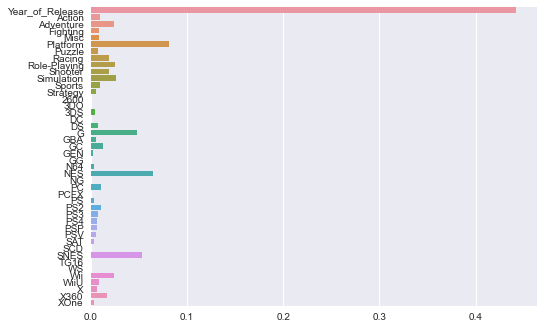

In [26]:
import seaborn as sns
sns.barplot(x = dr.feature_importances_, y = X_train.columns)

In [27]:
# Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

In [28]:
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
y_pred_test=regressor.predict(X_test)
y_pred_train=regressor.predict(X_train)

In [30]:
print("Error Metrics")
print("Training Errors")
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Train RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("-------------------------")
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))

Error Metrics
Training Errors
Train MAE: 0.4707085782727394
Train RMSE: 1.199126716506181
-------------------------
Test MAE: 0.5729908905646565
Test RMSE: 1.8544686947759788


<AxesSubplot:>

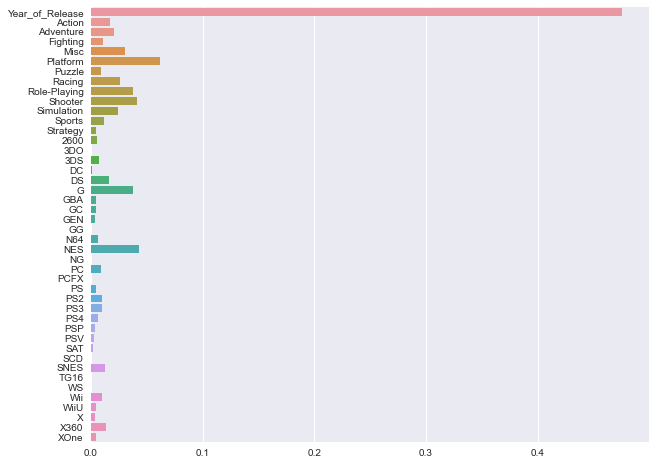

In [32]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x = regressor.feature_importances_, y = X_train.columns)

In [515]:
#train test split part 2 because i organized this poorly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [516]:
# Evaluating the Algorithm
#tested model to find lowest mean squared error

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5151139872964101
Mean Squared Error: 3.2507707161151216
Root Mean Squared Error: 1.802989383250806


In [ ]:
#predict
y_pred = regressor.predict(X_test.reshape(-1,3))
y_pred

In [ ]:
#remove NaN data from Year of Release
dataset = dataset[dataset.Year_of_Release.notnull()]

#Omitting video games released in 2017.
dataset = dataset.loc[dataset.Year_of_Release < 2017]

#Converting year of release to integers
dataset.Year_of_Release = dataset['Year_of_Release'].astype(int)

In [ ]:
#summary
dataset.info()


In [ ]:
#explore genre variable
dataset['Genre'].value_counts()

In [ ]:
data = pd.read_csv('Video_Game_Sales_as_of_Jan_2017.csv')

In [ ]:
#pulling only the data from 1991 to 2016
data = data.loc[data.Year_of_Release >= 1991]

#finding the median sales value by genre and year
Med_Sales_by_Gen_and_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'],aggfunc=np.median)
Med_Sales_by_Gen_and_Yr.columns = Med_Sales_by_Gen_and_Yr.columns.get_level_values(1)

Med_Sales_by_Gen_and_Yr.head()

In [ ]:
def Linear_Regression_Plot(Data):
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,12))

    x_data = np.transpose(np.matrix(Data.index))

    count = 0
    
    for genre in Data.columns:
        axs = axes[count//3,count%3]
        y_data = Data[genre].to_frame()
    
        # Linear regression
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)
        
        # Mean Squared Error
        MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
        Regr_Coeff.append(regr.coef_[0][0])
        Regr_MSE.append(MSE[0])

        Data[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()
        
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2007,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()
    
    return [Regr_Coeff,Regr_MSE]
    
[Regr_Coeff,Regr_MSE] = Linear_Regression_Plot(Med_Sales_by_Gen_and_Yr)

In [ ]:
#1991-2016 line graph slopes for popularity in each genre
def Linear_Regression_Plot(Data):
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,12))

    x_data = np.transpose(np.matrix(Data.index))

    count = 0
    
    for genre in Data.columns:
        axs = axes[count//3,count%3]
        y_data = Data[genre].to_frame()
    
        #linear regression
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)
        
        #mean Squared Error
        MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
        Regr_Coeff.append(regr.coef_[0][0])
        Regr_MSE.append(MSE[0])

        Data[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()
        
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2007,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()
    
    return [Regr_Coeff,Regr_MSE]
    
[Regr_Coeff,Regr_MSE] = Linear_Regression_Plot(Med_Sales_by_Gen_and_Yr)

In [ ]:
#missin values?
dataset.isnull().sum()

In [ ]:
#same thing but for 1995-2016 bc so many outliers and skew

Med_Sales_by_Gen_and_Yr = Med_Sales_by_Gen_and_Yr.loc[Med_Sales_by_Gen_and_Yr.index >= 1995]

[Regr_Coeff_After_95,Regr_MSE_After_95] = Linear_Regression_Plot(Med_Sales_by_Gen_and_Yr)

In [ ]:
Linear_Regression_Results = pd.DataFrame({'Regression Coeff After 1991':Regr_Coeff,
                                         'MSE After 1991':Regr_MSE,
                                         'Regression Coeff After 1995':Regr_Coeff_After_95,
                                         'MSE After 1995':Regr_MSE_After_95},
                                        index = list(Med_Sales_by_Gen_and_Yr.columns))
Column_Order = ['Regression Coeff After 1991','MSE After 1991','Regression Coeff After 1995',
                'MSE After 1995']

#printing linear regression results
Linear_Regression_Results[Column_Order].head(n=len(list(Med_Sales_by_Gen_and_Yr.columns)))

In [ ]:
#total global sales to see how bad my hypothesis was....

Med_Sales_by_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     values=['Global_Sales'],aggfunc=np.median)


fig = plt.figure(figsize=(13,5))
Med_Sales_by_Yr.plot()

x_data = np.transpose(np.matrix(Med_Sales_by_Yr.index))
y_data = Med_Sales_by_Yr
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)

plt.plot(x_data,regr.predict(x_data), color='black')

txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,np.mean((regr.predict(x_data)-y_data)**2))

plt.text(2011,0.8*Med_Sales_by_Yr.max(),txt)

plt.title('Median Global Sales')
plt.xlabel('Year')
plt.ylabel('Median Sales (in millions)')